In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import integrate  
from scipy.stats import gengamma, laplace, norm
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interactive
np.random.seed(42)

### Complete Prior Model for Signal $x$

In [2]:
def compute_prior_pdf(r, eta, scale=1, n_samples=1000, x_max=30):
    
    # Set parameters
    beta = (eta + 1.5)/r 
    
    # Discretization
    xs = np.linspace(-x_max, x_max, n_samples)

    # Preallocate 
    prior_pdf = np.full(xs.shape, np.nan)

    # Loop over xs
    for j, x in enumerate(xs):

        # Define integrands
        def gauss_density(theta):
            return (1./(np.sqrt(2*np.pi)*theta)) * np.exp(-0.5*(x/theta)**2)

        def gen_gamma_density(theta):
            return (r/scipy.special.gamma(beta)) * (1/scale) * (theta/scale)**(r*beta - 1) * np.exp(-(theta/scale)**r)

        def integrand(theta):
            return gauss_density(theta) * gen_gamma_density(theta)

        # Integrate 
        prior_pdf[j] = integrate.quad(integrand, 0, np.inf)[0]

    return xs, prior_pdf

def plot_prior_pdf(xs, prior_pdf):
    plt.plot(xs, prior_pdf, linewidth=2)
    plt.xlabel(r'$x$', fontsize=18)
    plt.ylabel(r'Prior Density $\pi(x)$', fontsize=18)
    plt.grid()
    
def plot_log_prior_pdf(xs, prior_pdf):
    plt.plot(xs, prior_pdf, linewidth=2)
    plt.xlabel(r'$x$', fontsize=18)
    plt.ylabel(r'Prior Density $\pi(x)$ (Log Scale)', fontsize=18)
    plt.yscale('log')
    plt.grid()

In [3]:
def compute_plot_prior_pdf(r, eta):
    
    xs, prior_pdf = compute_prior_pdf(r, eta)

    plt.subplot(121)
    plot_prior_pdf(xs, prior_pdf)

    plt.subplot(122)  
    plot_log_prior_pdf(xs, prior_pdf)

    plt.tight_layout()
    plt.show()

In [4]:
interactive_prior_plot = interactive(compute_plot_prior_pdf, r=(0.1, 2.0, 0.1), eta=(0.1, 5, 0.5))
output = interactive_prior_plot.children[-1]
interactive_prior_plot

interactive(children=(FloatSlider(value=1.0, description='r', max=2.0, min=0.1), FloatSlider(value=2.1, descri…

### Specify $r$ and $\eta$ below

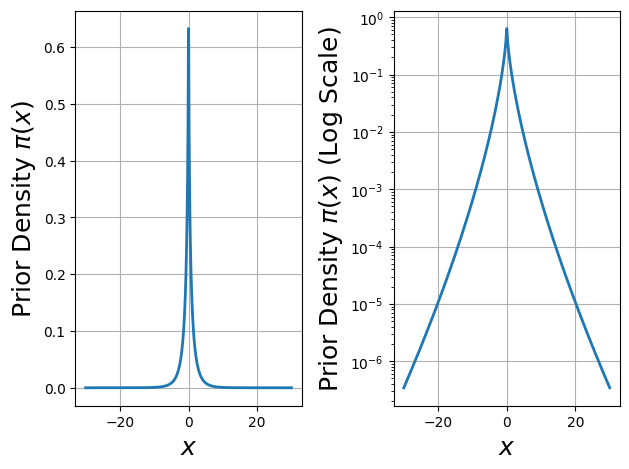

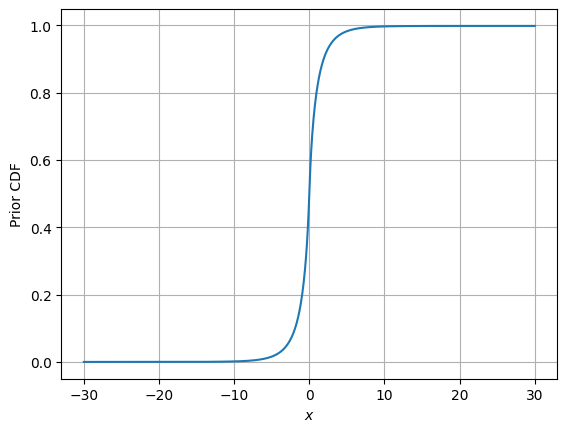

In [5]:
def compute_prior_cdf(xs, prior_pdf):
    prior_cdf = np.zeros_like(prior_pdf)
    for i in range(len(xs)):
        # Numerically integrate the PDF
        prior_cdf[i] = np.trapz(prior_pdf[:i+1], xs[:i+1]) 
    return prior_cdf

# Change below values
r = 1
eta = 0.01

xs, prior_pdf = compute_prior_pdf(r, eta)
prior_cdf = compute_prior_cdf(xs, prior_pdf)

# Plot
compute_plot_prior_pdf(r, eta)
plt.plot(xs, prior_cdf) 
plt.xlabel(r'$x$')
plt.ylabel('Prior CDF')
plt.grid() 
plt.show()


### Generalized Gamma Distribution

In [6]:
def plot_gen_gamma(r, eta, scale=1, n=1000, right_x_lim = 2):

    beta = (eta + 1.5)/r 
    xx = np.sort(gengamma.rvs(a = beta, c = r, size=n, scale = scale))
    plt.plot(xx, gengamma.pdf(xx, a = r, c = beta, scale = scale), 'r-', lw=5, alpha=0.6, label='gengamma pdf')
    plt.xlim((0, right_x_lim))

In [7]:
interactive_gengamma_plot = interactive(plot_gen_gamma, r=(0.01, 3.0, 0.01), eta=(0.1, 5, 0.1), n=(1000, 100000, 1000), scale=(0.25, 5, 0.25), right_x_lim = (1, 10))
output = interactive_gengamma_plot.children[-1]
interactive_gengamma_plot

interactive(children=(FloatSlider(value=1.5, description='r', max=3.0, min=0.01, step=0.01), FloatSlider(value…

In [8]:
num_samples = 1000

# Compute PDF    
xs, prior_pdf = compute_prior_pdf(r, eta)  

# Draw samples using numerically approximated PDF
samples = np.random.choice(xs, size=num_samples, replace=True, p=prior_pdf/np.sum(prior_pdf))



In [9]:
# Compute CDF
prior_cdf = compute_prior_cdf(xs, prior_pdf)
    
# Draw uniform samples  
u = np.random.rand(num_samples) 

# Map through CDF (similar to inversion we did in Data 140 using CDF)
u_x = np.interp(u, prior_cdf, xs)

# Draw samples using numerically approximated CDF
samples = u_x

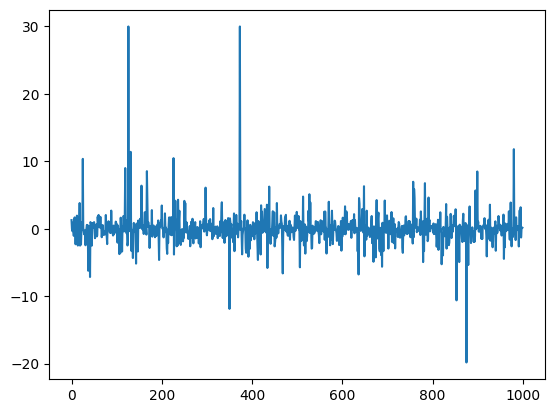

In [10]:
plt.plot(samples)